<a href="https://colab.research.google.com/github/saraswatnitin/CausalInferenceDiscoverywithML/blob/main/6_Concept_of_d_separation_estimand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept of d-separation & estimand

This secion formalizes the concept of $d$-separation and introduces the concept of estimand. We learn how $d$-separation in a graph translates to regression analysis. Next, we focus on estimands. We define basic  estimands: back-door and front-door criteria. Next, we introduce other criteria and the concept of Pearl’s $do$-calculus. Finally, we translate our new knowledge into Python code and perform a couple of exercises to solidify our new knowledge.

In [1]:
from itertools import combinations

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [2]:

COLORS = [
    '#00B0F0',
    '#FF0000'
]

## Visualizations

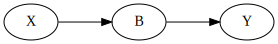

In [11]:

graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'B', 'Y']
positions = ['1,0!', '2.5,0!', '4,0!'] # this is used for positioning of nodes and edges https://observablehq.com/@magjac/placing-graphviz-nodes-in-fixed-positions
#horizontal & vertical positioning of nodes are specified in first and second places respectively

#We can try different variations of how we would like to position these nodes meaningfully
#positions = ['1,1!', '1,0!', '3,0!']


edges = ['XB', 'BY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/d_sep_00')

graph

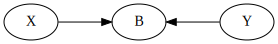

In [12]:

graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'B', 'Y']
positions = ['1,0!', '2.5,0!', '4,0!']

edges = ['XB', 'YB']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/d_sep_01')

graph

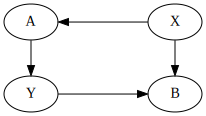

In [13]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y']
positions = ['1,1!', '3,1!', '3,0!', '1, 0!']

edges = ['XB', 'YB', 'XA', 'AY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/d_sep_02')

graph

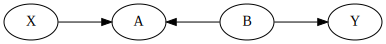

In [14]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y']
positions = ['1.5,0!', '0,0!', '3,0!', '4.5,0!']

edges = ['XA', 'BA', 'BY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/d_sep_03')

graph

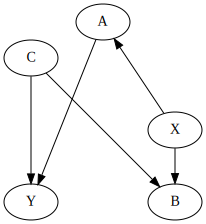

In [15]:

graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y', 'C']
positions = ['2,2.5!', '3,1!', '3,0!', '1, 0!', '1,2!']

edges = ['XA', 'XB', 'CB', 'CY', 'AY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/d_sep_04')

graph

## Estimand first!

In [16]:
# Commute example
t = [22.1, 23.7, 25.2, 20.0, 21.8]

In [17]:
np.mean(t)

22.56

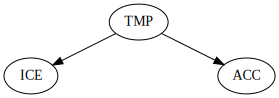

In [18]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['ICE', 'TMP', 'ACC']
positions = ['0,0!', '1.5,.75!', '3,0!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edge('TMP', 'ICE')
graph.edge('TMP', 'ACC')

graph.render(f'img/icecream')

graph

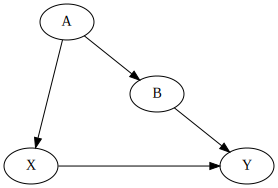

In [19]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'Y', 'A', 'B']
positions = ['0,0!', '3,0!', '.5,2!', '1.75,1!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(['XY', 'AX', 'AB', 'BY'])

graph.render(f'img/equivalent_estimands_00')

graph

In [ ]:
?graph.edge

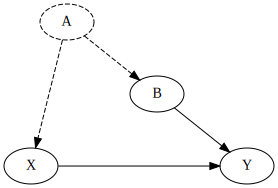

In [20]:
graph = graphviz.Digraph(format='png', engine='neato')


nodes = ['X', 'Y', 'A', 'B']
positions = ['0,0!', '3,0!', '.5,2!', '1.75,1!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('A', style='dashed')

graph.edges(['XY', 'BY'])
graph.edge('A', 'X', style='dashed')
graph.edge('A', 'B', style='dashed')

graph.render(f'img/ch_06_equivalent_estimands_01')

graph

## Front-door criterion

In [21]:
##!pip install dowhy

In [22]:

##from dowhy.causal_model import CausalModel

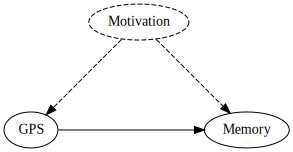

In [25]:
## In 2020 a university study suggested that there is a link between extensive GPS usage and a human brain's spatial memory decline
## Some practitioner's suggested that the causal link shown in above study was suprious and "low global motivation" is a potential confounder
## as it impacts both high GPS usage and low spatial memory usage
## Since this confounder could not be observed , so we cannot use back door criterion to block all back door and control for the variable and find
## the cause-effect
## Hence we rely on something called mediator in which a variable called Hippocampus volume was used as a mediator ( the path
## from cause to effect must go through the mediator)



graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['GPS', 'Memory', 'Motivation']
positions = ['0,0!', '3,0!', '1.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('Motivation', style='dashed')

graph.edge('Motivation', 'GPS', style='dashed')
graph.edge('Motivation', 'Memory', style='dashed')
graph.edge('GPS', 'Memory')

graph.render(f'img/ch_06_gps_01')

graph

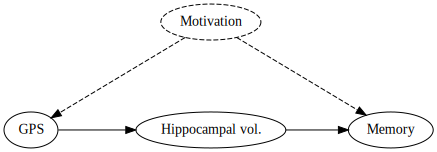

In [26]:

graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['GPS', 'Hippocampal vol.', 'Memory', 'Motivation']
positions = ['0,0!', '2.5,0!', '5,0!', '2.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('Motivation', style='dashed')

graph.edge('Motivation', 'GPS', style='dashed')
graph.edge('Motivation', 'Memory', style='dashed')
graph.edge('GPS', 'Hippocampal vol.')
graph.edge('Hippocampal vol.', 'Memory')

graph.render(f'img/ch_06_gps_02')

graph

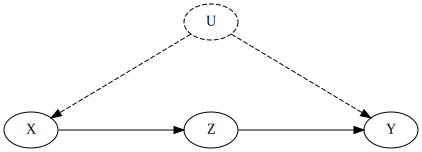

In [28]:
## Lets introdue an mediator


graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'Z', 'Y', 'U']
positions = ['0,0!', '2.5,0!', '5,0!', '2.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('U', style='dashed')

graph.edge('U', 'X', style='dashed')
graph.edge('U', 'Y', style='dashed')
graph.edge('X', 'Z')
graph.edge('Z', 'Y')

graph.render(f'img/ch_06_gps_03')

graph

### Front-door in practice

In [29]:

from sklearn.linear_model import LinearRegression

In [30]:
# First, we'll build a structural causal model (SCM)
class GPSMemorySCM:

    def __init__(self, random_seed=None):
        self.random_seed = random_seed
        self.u_x = stats.truncnorm(0, np.infty, scale=5)
        self.u_y = stats.norm(scale=2)
        self.u_z = stats.norm(scale=2)
        self.u = stats.truncnorm(0, np.infty, scale=4)

    def sample(self, sample_size=100, treatment_value=None):  #Calling this method will return an observational distribution from our system
        """Samples from the SCM"""
        if self.random_seed:
            np.random.seed(self.random_seed)

        u_x = self.u_x.rvs(sample_size)  # we sample exogenous variables
        u_y = self.u_y.rvs(sample_size)  # we sample exogenous variables
        u_z = self.u_z.rvs(sample_size)  # we sample exogenous variables
        u = self.u.rvs(sample_size)
## we compute the values of the three observed variables in our model, gps, hippocampus, and
## memory, which represent GPS usage, hippocampal volume, and spatial memory change respectively.
        if treatment_value:
            gps = np.array([treatment_value]*sample_size)
        else:
            gps = u_x + 0.7*u

        hippocampus = -0.6*gps + 0.25*u_z
        memory = 0.7*hippocampus + 0.25*u

        return gps, hippocampus, memory

    def intervene(self, treatment_value, sample_size=100):
        """Intervenes on the SCM"""
        return self.sample(treatment_value=treatment_value, sample_size=sample_size)

In [31]:

# Instantiate the SCM
scm = GPSMemorySCM()

# Generate observational data
gps_obs, hippocampus_obs, memory_obs = scm.sample(600)

# Run an experiment
treatments = []
experiment_results = []

# Sample over various treatments
for treatment in np.arange(1, 21):  #let’s run an experiment. We will use a range of treatments from 1 to 20 units of GPS usage
    gps_hours, hippocampus, memory = scm.intervene(treatment_value=treatment, sample_size=30)
    experiment_results.append(memory)
    treatments.append(gps_hours)

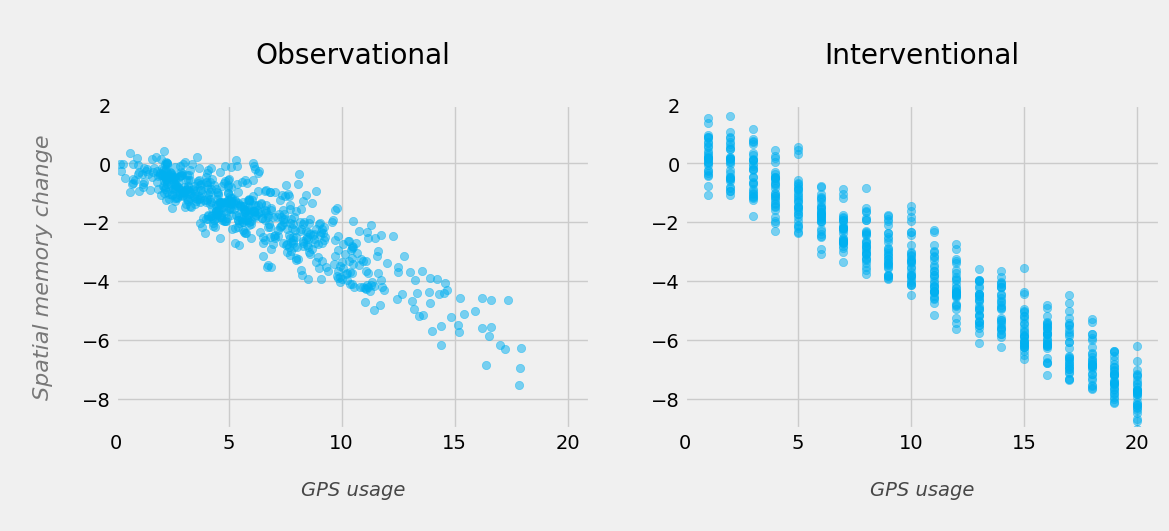

In [32]:

# Plot observational data
plt.figure(figsize=(12, 4))

# Observational
plt.subplot(121)
plt.scatter(gps_obs, memory_obs, alpha=.5, color=COLORS[0])
plt.xlim(0, 21)
plt.ylim(-9, 2)

plt.title('\nObservational\n')
plt.xlabel('\nGPS usage', alpha=.7, fontsize=14, style='italic')
plt.ylabel('\nSpatial memory change\n', alpha=.5, fontsize=16, style='italic')


# Interventional
plt.subplot(122)

plt.scatter(treatments, experiment_results, alpha=.5, color=COLORS[0])
plt.xlim(0, 21)
plt.ylim(-9, 2)

plt.title('\nInterventional\n')
plt.xlabel('\nGPS usage\n', alpha=.7, fontsize=14, style='italic')

plt.show()
#GPS usage and spatial memory change in observational and interventional samples
#As we  can see, the distributions in the scatterplots differ.
# Let’s fit two linear regression models – one on the observational data and one on the interventional data – and compare the results.
# What results do you expect?

### Naive model 1

In [48]:
# we fit two linear regression models one on observational data and one on intervention data and compare the results
lr_naive = LinearRegression()
lr_naive.fit(
    X=gps_obs.reshape(-1, 1),
    y=memory_obs
)

LinearRegression()

### Experimental model

In [34]:

treatments_unpack = np.array(treatments).flatten()
results_unpack = np.array(experiment_results).flatten()

lr_experiment = LinearRegression()
lr_experiment.fit(
    X=treatments_unpack.reshape(-1, 1),
    y=results_unpack
)

LinearRegression()

In [35]:

X_test = np.arange(1, 21).reshape(-1, 1)

preds_naive = lr_naive.predict(X_test)
preds_experiment = lr_experiment.predict(X_test)

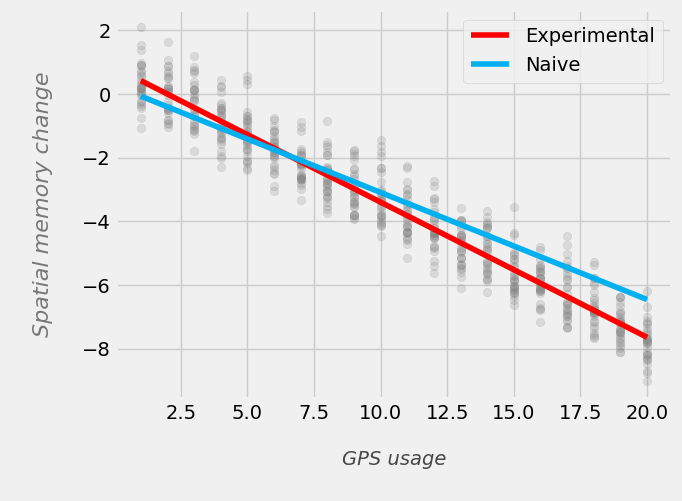

In [36]:

plt.scatter(treatments, experiment_results, alpha=.2, color='gray')
plt.plot(X_test, preds_experiment, label='Experimental', color=COLORS[1])
plt.plot(X_test, preds_naive, label='Naive', color=COLORS[0])

plt.xlabel('\nGPS usage\n', alpha=.7, fontsize=14, style='italic')
plt.ylabel('\nSpatial memory change\n', alpha=.5, fontsize=16, style='italic')

plt.legend()
plt.show()

In [37]:

# Get coefficients
print(f'Naive model:\n{lr_naive.coef_[0]}\n')
print(f'Experiemntal model:\n{lr_experiment.coef_[0]}')

# As expected, the coefficient values for both models differ
# Let’s compute a valid causal coefficient from observational data using the front-door
# criterion in three simple steps.

Naive model:
-0.33615677447004416

Experiemntal model:
-0.42416970915131463


#### The Linear Bridge to The Causal Promised Land

In [38]:
##from dowhy.causal_model import CausalModel
from sklearn.linear_model import LinearRegression

In [47]:
# If we have linear model we can compute the valid estimate of the causal effect of X on Y in three simple steps:
# Fit a model, Z ~ X
# Fit a model, Y ~ Z + X
# Multiply the coefficients from model 1 and model 2

In [39]:
# Model E(Z|X)
lr_zx = LinearRegression()
lr_zx.fit(
    X=gps_obs.reshape(-1, 1),
    y=hippocampus_obs
)

# Model E(Y|X, Z)E(X)
lr_yxz = LinearRegression()
lr_yxz.fit(
    X=np.array([gps_obs,hippocampus_obs]).T,
    y=memory_obs
)

# Compute the expected causal effect
lr_zx.coef_[0] * lr_yxz.coef_[1]

# this is very close to interventional model coefficient

-0.4136824159155331

### Instrumental variables

*The two models are as follows:*

*• Y ~ Z*

*• X ~ Z*</font>



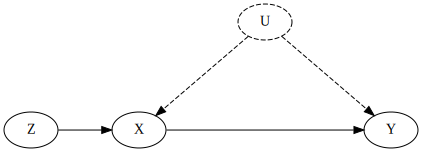

In [50]:

graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['Z', 'X', 'Y', 'U']
positions = ['0,0!', '1.5,0!', '5,0!', '3.25,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('U', style='dashed')

graph.edge('U', 'X', style='dashed')
graph.edge('U', 'Y', style='dashed')
graph.edge('Z', 'X')
graph.edge('X', 'Y')

graph.render(f'img/instrumental_00')

graph

In [52]:

# First, we'll build a structural causal model (SCM)
class InsrumentalSCM:

    def __init__(self, random_seed=None):
        self.random_seed = random_seed
        self.u_xy = stats.norm()
        self.u_z = stats.norm()

    def sample(self, sample_size=100):
        """Samples from the SCM"""
        if self.random_seed:
            np.random.seed(self.random_seed)

        u_xy = self.u_xy.rvs(sample_size)
        u_z = self.u_z.rvs(sample_size)

        z = u_z
        x = 0.7*z + 0.2*u_xy
        y = 0.8*x + 0.1*u_xy

        return z, x, y

In [53]:


# Instantiate the SCM and sample
instr_scm = InsrumentalSCM()
z, x, y = instr_scm.sample(1000)

In [54]:

# Fit regression 1
#To calculate the causal effect of X on Y in a linear case, all we need to do is fit two linear regression
#models and compute the ratio of their coefficients!
# we fit two linear regression models Y~ Z, X~Z

lr_yz = LinearRegression()
lr_yz.fit(X=z.reshape(-1, 1), y=y)

# Fit regression 2
lr_xz = LinearRegression()
lr_xz.fit(X=z.reshape(-1, 1), y=x)

LinearRegression()

In [55]:

# Compute the causal effect
causal_effect = lr_yz.coef_[0] / lr_xz.coef_[0]
causal_effect

0.8025613909396859

In [56]:
# Sanity check
random_z = np.random.randn()

random_z * .7 * .8, random_z * .7 * causal_effect

(0.16040076004906625, 0.16091432136595177)

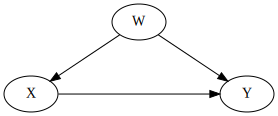

In [57]:

graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'W', 'Y']
positions = ['1,0!', '2.5,1!', '4,0!']

edges = ['XY', 'WY', 'WX']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(r'C:\Users\aleks\OneDrive\Pulpit\BCKDR.png')

graph